In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas_datareader as data

In [6]:
start = "2010-01-01"
end = "2021-12-31"
df = data.DataReader("Goog","yahoo",start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,15.576615,15.441621,15.560426,15.441621,48974884.0,15.441621
2010-01-04,15.678981,15.547723,15.615220,15.610239,78541293.0,15.610239
2010-01-05,15.637387,15.480475,15.620949,15.541497,120638494.0,15.541497
2010-01-06,15.588072,15.102393,15.588072,15.149715,159744526.0,15.149715
2010-01-07,15.193053,14.760922,15.178109,14.797037,257533695.0,14.797037


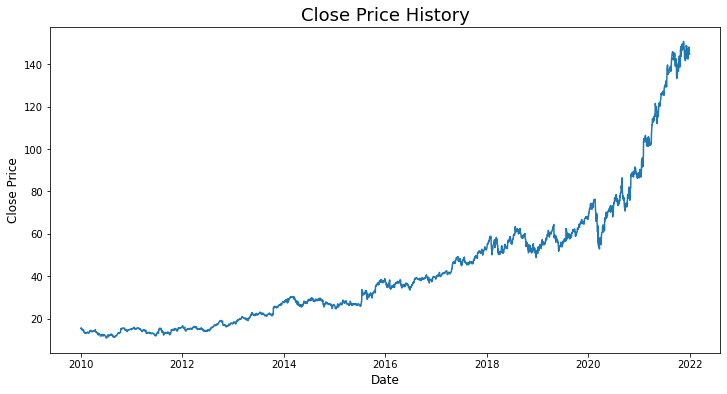

In [7]:
plt.figure(figsize=(12,6))
plt.title('Close Price History', fontsize =18)
plt.plot(df['Close'])
plt.xlabel('Date' ,fontsize = 12)
plt.ylabel ('Close Price' ,fontsize = 12)
plt.show()

In [8]:
ma100 = df['Close'].rolling(100).mean()
ma100

Date
2009-12-31           NaN
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
                 ...    
2021-12-27    143.024870
2021-12-28    143.119950
2021-12-29    143.214635
2021-12-30    143.294640
2021-12-31    143.360470
Name: Close, Length: 3022, dtype: float64

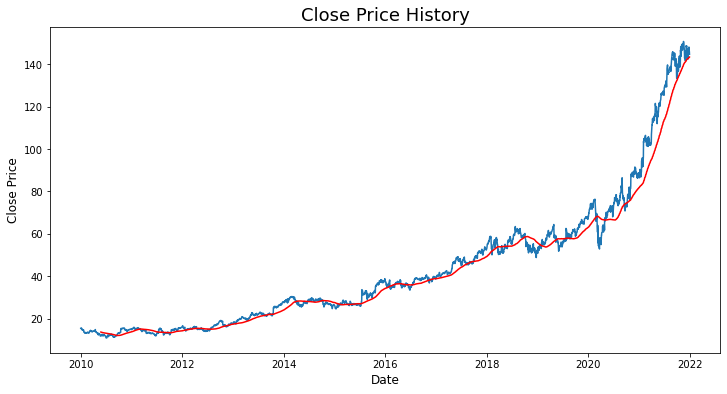

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma100,'r')
plt.title('Close Price History', fontsize =18)
plt.xlabel('Date' ,fontsize = 12)
plt.ylabel ('Close Price' ,fontsize = 12)
plt.show()

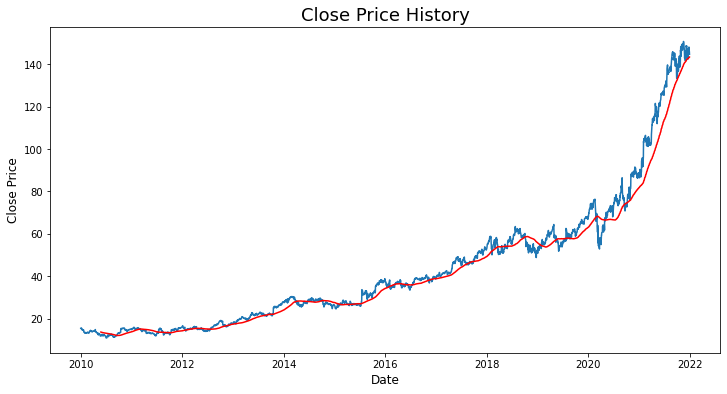

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma100,'r')
plt.title('Close Price History', fontsize =18)
plt.xlabel('Date' ,fontsize = 12)
plt.ylabel ('Close Price' ,fontsize = 12)
plt.show()

In [11]:
ma200 = df['Close'].rolling(200).mean()
ma200

Date
2009-12-31           NaN
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
                 ...    
2021-12-27    131.673405
2021-12-28    131.889023
2021-12-29    132.098415
2021-12-30    132.305658
2021-12-31    132.520000
Name: Close, Length: 3022, dtype: float64

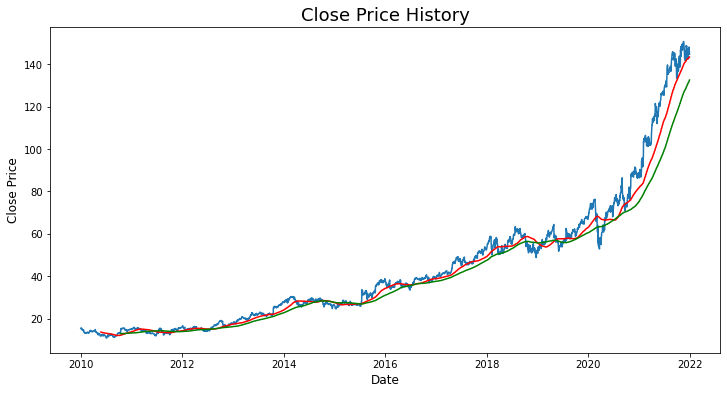

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma100,'r')
plt.plot(ma200,'g')
plt.title('Close Price History', fontsize =18)
plt.xlabel('Date' ,fontsize = 12)
plt.ylabel ('Close Price' ,fontsize = 12)
plt.show()

In [13]:
df.shape

(3022, 6)

In [14]:
# splitting data into training and testing
training_data = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
testing_data = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])


print(training_data.shape)
print(testing_data.shape)


(2115, 1)
(907, 1)


In [15]:
training_data.head()

,Close
Date,
2009-12-31,15.441621
2010-01-04,15.610239
2010-01-05,15.541497
2010-01-06,15.149715
2010-01-07,14.797037


In [16]:
testing_data.head()

,Close
Date,
2018-05-29,53.015999
2018-05-30,53.389999
2018-05-31,54.249500
2018-06-01,55.974998
2018-06-04,56.964500


In [17]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
training_arr = scaler.fit_transform(training_data)
training_arr

array([[0.09556622],
       [0.09908416],
       [0.09764998],
       ...,
       [0.89969951],
       [0.8992301 ],
       [0.89549554]])

In [19]:
x_train = []
y_train = []

for i in range(100,training_arr.shape[0]):
    x_train.append(training_arr[i-100:i])
    y_train.append(training_arr[i])


In [20]:
#converting lists into numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)

In [21]:
x_train.shape 

(2015, 100, 1)

In [22]:
y_train.shape

(2015, 1)

In [23]:
#ML model

In [24]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [25]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [26]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu',return_sequences = True, input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu',return_sequences = True ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu',return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [28]:
model.compile(optimizer = 'adam' , loss ='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
63/63 [==============================] - 21s 220ms/step - loss: 0.0327
Epoch 2/50
63/63 [==============================] - 14s 225ms/step - loss: 0.0072
Epoch 3/50
63/63 [==============================] - 16s 251ms/step - loss: 0.0059
Epoch 4/50
63/63 [==============================] - 16s 247ms/step - loss: 0.0062
Epoch 5/50
63/63 [==============================] - 16s 249ms/step - loss: 0.0056
Epoch 6/50
63/63 [==============================] - 14s 223ms/step - loss: 0.0046
Epoch 7/50
63/63 [==============================] - 14s 221ms/step - loss: 0.0047
Epoch 8/50
63/63 [==============================] - 14s 220ms/step - loss: 0.0047
Epoch 9/50
63/63 [==============================] - 14s 220ms/step - loss: 0.0048
Epoch 10/50
63/63 [==============================] - 15s 238ms/step - loss: 0.0043
Epoch 11/50
63/63 [==============================] - 18s 277ms/step - loss: 0.0042
Epoch 12/50
63/63 [==============================] - 16s 258ms/step - loss: 0.0039
Epoch 13/50
6

In [29]:
model.save('keras-model.h5')

In [30]:
testing_data.head()

,Close
Date,
2018-05-29,53.015999
2018-05-30,53.389999
2018-05-31,54.249500
2018-06-01,55.974998
2018-06-04,56.964500


In [31]:
past_100_days = training_data.tail(100)
final_df = past_100_days.append(testing_data, ignore_index = True)
final_df.head()

C:\Users\Prasansa Rai\AppData\Local\Temp\ipykernel_8872\1708861519.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(testing_data, ignore_index = True)


,Close
0,54.124001
1,54.320000
2,55.111500
3,55.347000
4,55.313000


In [32]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.05214037],
       [0.05406386],
       [0.06183143],
       ...,
       [0.95873817],
       [0.95381168],
       [0.94082813]])

In [33]:
input_data.shape

(1007, 1)

In [34]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0],1):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i])

In [35]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(907, 100, 1)
(907, 1)


In [36]:
# Make predictions

y_predicted = model.predict(x_test)
y_predicted.shape

29/29 [==============================] - 4s 89ms/step


(907, 1)

In [37]:
y_predicted

array([[0.10569695],
       [0.10454364],
       [0.10316946],
       [0.10180679],
       [0.1007556 ],
       [0.10030079],
       [0.10062942],
       [0.10180849],
       [0.10376327],
       [0.10626927],
       [0.10909532],
       [0.11205383],
       [0.11493614],
       [0.11758521],
       [0.11988583],
       [0.12182604],
       [0.12342909],
       [0.12474453],
       [0.1257959 ],
       [0.1265965 ],
       [0.12706949],
       [0.12709096],
       [0.1265651 ],
       [0.12549274],
       [0.12396213],
       [0.12216143],
       [0.12022066],
       [0.11832669],
       [0.11670673],
       [0.115583  ],
       [0.11509636],
       [0.11529756],
       [0.11624327],
       [0.11791199],
       [0.12020451],
       [0.12304208],
       [0.12622628],
       [0.1295751 ],
       [0.13287184],
       [0.13596395],
       [0.13886833],
       [0.1416861 ],
       [0.14453897],
       [0.14744398],
       [0.15031475],
       [0.15301952],
       [0.15542209],
       [0.157

In [38]:
y_test

array([[0.04126674],
       [0.04493708],
       [0.05337199],
       [0.07030558],
       [0.08001629],
       [0.08019785],
       [0.07883375],
       [0.07244499],
       [0.07097782],
       [0.0754529 ],
       [0.080031  ],
       [0.07780817],
       [0.08631179],
       [0.08638048],
       [0.09678305],
       [0.09413334],
       [0.09500677],
       [0.08903019],
       [0.08796049],
       [0.07291115],
       [0.06979528],
       [0.06269015],
       [0.06771475],
       [0.06841646],
       [0.07421147],
       [0.06215529],
       [0.07264618],
       [0.08044808],
       [0.08725881],
       [0.08666507],
       [0.08718521],
       [0.10169973],
       [0.10432002],
       [0.1018862 ],
       [0.10921704],
       [0.10778424],
       [0.10340732],
       [0.1024014 ],
       [0.11250467],
       [0.13339809],
       [0.14106264],
       [0.14333451],
       [0.12869731],
       [0.11949203],
       [0.11827512],
       [0.11962452],
       [0.12263733],
       [0.121

In [39]:
scaler.scale_

array([0.00981374])

In [40]:
scale_factor = 1/0.00988704
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

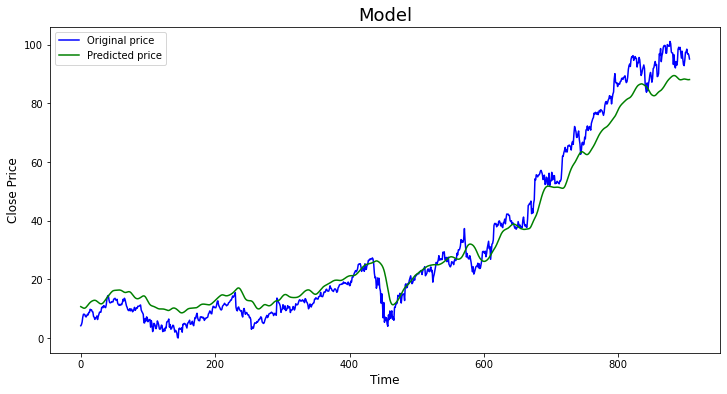

In [41]:
plt.figure(figsize=(12,6))
plt.plot(y_test , 'b',label ='Original price' )
plt.plot(y_predicted , 'g',label ='Predicted price' )
plt.title('Model',fontsize = 18)
plt.xlabel('Time', fontsize = 12)
plt.ylabel('Close Price', fontsize = 12)
plt.legend()
plt.show()

In [42]:
import math

from sklearn.metrics import mean_squared_error

In [43]:
rmse = math.sqrt(mean_squared_error(y_test,y_predicted))

In [44]:
rmse

5.76505890017012